In [85]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
plt.style.use('dark_background')

def evaluate(path, wandb_name):
    api = wandb.Api()
    run = api.run(wandb_name)
    run_history=run.history()
    
    with open(path) as f:
        data = json.load(f)
    # dict_keys(['mean_loss', 'average_precision_score', 'confusion_matrix', 'roc', 'precision_recall_curve', 'det'])
    def get_confusion_matrix(data):
        cm_d = data['confusion_matrix'] # confusion matrix dict
        cm = pd.DataFrame([[cm_d['true_pos'], cm_d['false_neg']],
                           [cm_d['false_pos'], cm_d['true_neg']]],
                          index=['true','false'],
                          columns=['positive','negative'],
                         )
        return cm
    def get_roc(data):
        return pd.DataFrame(data['roc'])
    
    def plot_loss(run_history, ax):
        ax.plot(run_history['_step'],
                run_history['loss'],
                lw=1,
                alpha=0.5,
               )
        ax.set_xticks(list(range(max(run_history['_step'])))[::10000],
                      list(range(max(run_history['_step'])))[::10000],
                     rotation=80)
                                     
        ax.set_xlabel('Step')
        ax.set_ylabel('Binary Cross Entropy Loss')
        ax.set_title('Training Loss')
    def plot_confusion_matrix(cm, ax):
        sns.heatmap(cm, ax=ax, annot=True)
        ax.set_title('Confusion Matrix')
    def plot_roc(roc, ax):
        ax.plot(roc['false_pos'],
                roc['true_pos'],
               )
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Receiver Operator Curve (ROC)')
    def plot_precision_recall(precision_recall, ax):
        ax.plot(precision_recall['recall'],
                precision_recall['precision'],
                lw=1,
               )
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_title('Precision Recall Curve')
    def plot_det(det, ax):
        ax.plot(det['fpr'],
                det['fnr'],
                lw=1,
               )
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Detection Error Tradeoff (DET) Curve')
        
        
    mean_loss = data['mean_loss']
    average_precision_score = data['average_precision_score']
    cm = get_confusion_matrix(data)
    roc = get_roc(data)
    
    fig, ax = plt.subplots(3,2, figsize=(8,12))
    plot_loss(run_history, ax[0,0])
    plot_confusion_matrix(cm, ax[0,1])
    plot_roc(roc, ax[1,0])
    plot_precision_recall(data['precision_recall_curve'], ax[1,1])
    plot_det(data['det'], ax[2,0])
    ax[2,1].text( 0.1,0.5, f"Mean Loss : {round(data['mean_loss'],3)}\nAverage Precision Score : {round(data['average_precision_score'],3)}")
    ax[2,1].axis('off')
    plt.tight_layout()
    plt.title(f"Model evaluation for {run.name}")
    plt.show()

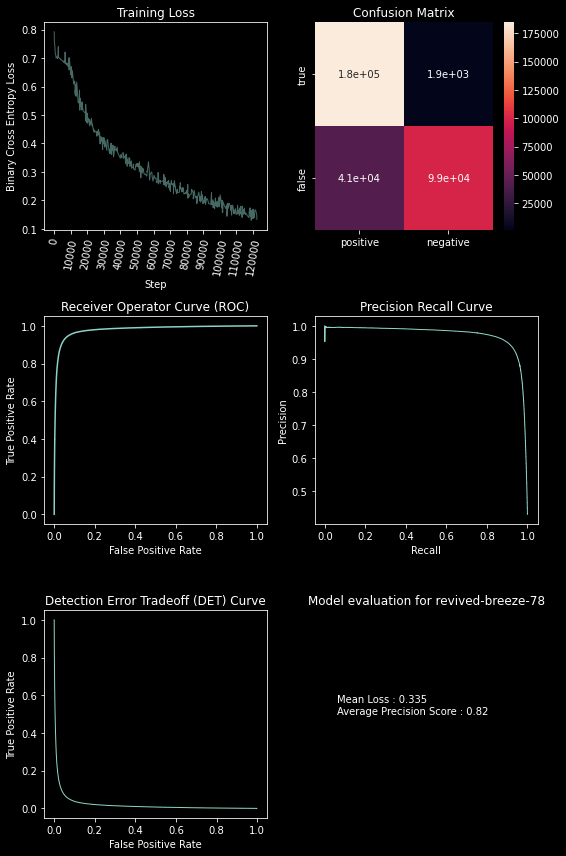

In [86]:
evaluate(path='../model/weights/revived-breeze-78/test.json', 
         wandb_name='jamesengleback/sxfst/runs/2hc5t41i')

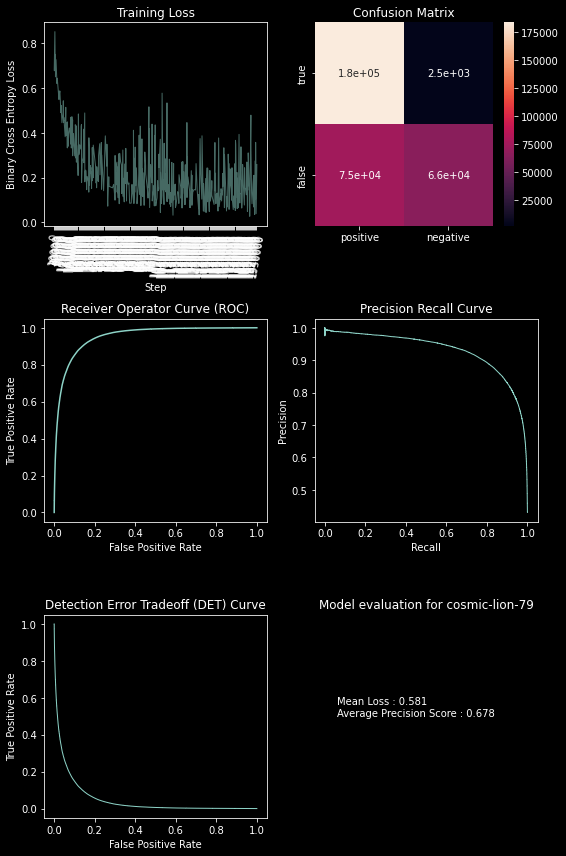

In [88]:
evaluate(path='../model/weights/cosmic-lion-79/val.json', 
         wandb_name='jamesengleback/sxfst/runs/2rg2005c')

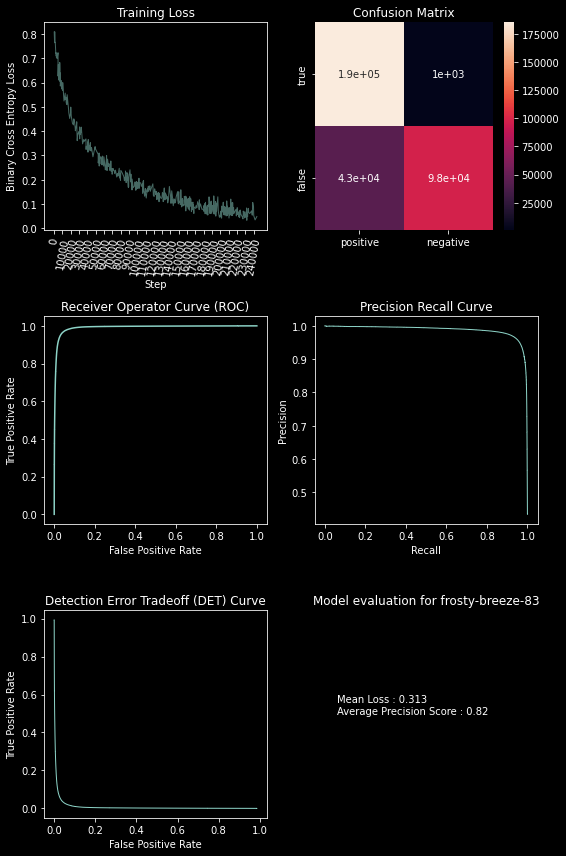

In [89]:
evaluate(path='../model/weights/frosty-breeze-83/val.json', 
         wandb_name='jamesengleback/sxfst/runs/3h3z2c4q')